In [27]:
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

def preprocessingIris():
    iris = datasets.load_iris()
    x= iris.data
    y =iris.target
    y = to_categorical(y, num_classes=3)
    x=np.append(x,np.ones((150,1)),axis=1)
    print x.shape, y.shape
    return(x,y)

def sigmoid(u):
      return 1. / (1. + np.e ** -u)
    
def splitTrainTest():
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state=42, shuffle ='False')
    print x_train.shape, y_train.shape
    return(x_train,x_test,y_train,y_test) 



In [28]:
(x,y)=preprocessingIris()
(x_train,x_test,y_train,y_test)=splitTrainTest()

(150, 5) (150, 3)
(100, 5) (100, 3)


In [37]:
import math
def backprop():
    input_arr = x_train
    alpha=0.0001
    #initialising weights
    weight1 = np.random.randn(5,5)
    weight2 = np.random.randn(5,3)

    i=0
    error = 1000
    while ((i<10000)):
        
        #forward Pass
        hiddenLayerInput = np.dot(input_arr,weight1)
        hiddenLayerOutput = sigmoid(hiddenLayerInput)
        outputLayerInput = np.dot(hiddenLayerOutput,weight2)
        FinalOutput = sigmoid(outputLayerInput)

        #error calculation
        difference= y_train - FinalOutput
        error=np.sum(np.square(difference))/2.0
        print error,i
        plt.plot(i,error,'r*')

        #weight updation output layer
        delta = -1.0*(difference)*FinalOutput*(1.0-FinalOutput)
        weight2 -= (alpha*np.dot(np.transpose(hiddenLayerOutput),delta))

        #weight updation hidden layers
        temp = hiddenLayerOutput*(1.0-hiddenLayerOutput)
        temp2 = np.dot((delta),np.transpose(weight2))*temp
        weight1 -= alpha*np.dot(np.transpose(temp2),input_arr)
        i+=1
    print "Number of iterations : " , i  
    return(weight1, weight2)
    

49.2038681327 0
49.180848962 1
49.1578033058 2
49.1347312672 3
49.1116329499 4
49.0885084591 5
49.0653579007 6
49.0421813818 7
49.0189790105 8
48.995750896 9
48.9724971484 10
48.949217879 11
48.9259132001 12
48.9025832249 13
48.8792280678 14
48.8558478444 15
48.8324426709 16
48.8090126651 17
48.7855579453 18
48.7620786314 19
48.738574844 20
48.7150467048 21
48.6914943366 22
48.6679178634 23
48.64431741 24
48.6206931025 25
48.5970450678 26
48.5733734342 27
48.5496783307 28
48.5259598876 29
48.5022182363 30
48.4784535091 31
48.4546658394 32
48.4308553618 33
48.4070222117 34
48.3831665259 35
48.359288442 36
48.3353880988 37
48.3114656361 38
48.2875211949 39
48.2635549169 40
48.2395669454 41
48.2155574244 42
48.1915264989 43
48.1674743154 44
48.1434010209 45
48.1193067638 46
48.0951916937 47
48.0710559608 48
48.0468997167 49
48.0227231141 50
47.9985263065 51
47.9743094486 52
47.9500726961 53
47.925816206 54
47.901540136 55
47.877244645 56
47.8529298929 57
47.8285960409 58
47.8042432508 59


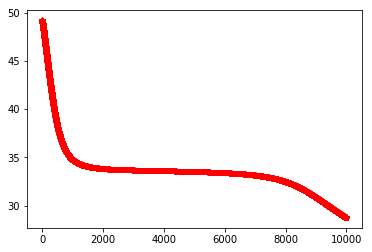

In [38]:
(weight1,weight2) = backprop()

In [39]:
def testBackProp(weight1, weight2):
    print x.shape
    input_arr=x_train #normalise
   
    hiddenLayerInput = np.dot(input_arr,weight1)
    hiddenLayerOutput = 1/(1+np.exp(-hiddenLayerInput))
    outputLayerInput = np.dot(hiddenLayerOutput,weight2)
    FinalOutput = 1/(1+np.exp(-outputLayerInput))
    
    y_pred_class = np.argmax(FinalOutput,axis=1)
    y_test_class = np.argmax(y_train,axis=1)
   
    
    success =0.0;failure =0.0; result=0.0
    for i in range(0,x_train.shape[0]):
        print y_pred_class[i],y_test_class[i]
        if(y_pred_class[i]==y_test_class[i]):
            success+=1
        else:
            failure+=1
    result = success / x_train.shape[0]
    
    print result*100
    return

In [40]:
testBackProp(weight1,weight2);

(150, 5)
2 1
2 2
2 1
0 0
2 2
2 1
0 0
0 0
0 0
2 1
2 2
0 0
0 0
0 0
2 1
0 0
2 1
2 2
0 0
2 1
2 2
0 0
2 2
2 2
2 1
2 1
2 2
2 1
0 0
2 1
2 2
0 0
0 0
2 1
2 1
0 0
2 2
0 0
0 0
2 1
1 1
2 2
2 1
2 2
2 2
2 1
0 0
0 0
2 2
2 2
0 0
0 0
0 0
2 1
2 2
0 0
2 2
2 2
0 0
2 1
2 1
2 2
2 1
2 2
0 0
2 2
2 1
2 2
2 1
2 1
2 1
0 0
2 1
2 1
0 0
2 1
2 2
2 2
0 0
2 1
2 2
2 2
0 0
2 2
0 0
2 1
2 2
2 2
2 1
2 2
2 1
2 1
2 2
2 2
0 0
2 1
2 2
0 0
2 1
2 2
66.0
